In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

from data_loading import (load_m1h_activation_data,
                          load_annotated_6k_collection)

In [2]:
m1h = load_m1h_activation_data()
tfs = load_annotated_6k_collection()

/Users/lukelambourne/work/tf_isoforms/analysis/i_integrative_analysis/data_loading.py:1206: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbd = dbd.append(
/Users/lukelambourne/work/tf_isoforms/analysis/i_integrative_analysis/data_loading.py:1232: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbd = dbd.append(
/Users/lukelambourne/work/tf_isoforms/analysis/i_integrative_analysis/data_loading.py:1232: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbd = dbd.append(
/Users/lukelambourne/work/tf_isoforms/analysis/i_integrative_analysis/data_loading.py:1232: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbd = dbd.append(
/Users/lukelambourne

reading from cache
missing disorder data for ZBTB18-1
missing disorder data for ZBTB18-2
missing disorder data for ZBTB48-1
missing disorder data for PRDM16-1
missing disorder data for PRDM16-2
missing disorder data for RORC-1
missing disorder data for ZBTB49-1
missing disorder data for ZNF655-1
missing disorder data for ZNF655-2
missing disorder data for ZNF212-1
missing disorder data for ZNF212-2
missing disorder data for ZBTB16-1
missing disorder data for ZBTB16-2
missing disorder data for ZBTB44-1
missing disorder data for GLI1-1
missing disorder data for GLI1-2
missing disorder data for GLI1-3
missing disorder data for ZBTB1-1
missing disorder data for ZNF263-1
missing disorder data for E4F1-1
missing disorder data for ZSCAN32-1
missing disorder data for SP2-1
missing disorder data for ZNF18-1
missing disorder data for ZNF473-1
missing disorder data for ZNF341-1
missing disorder data for ZNF341-2
missing disorder data for ZFY-1
missing disorder data for ZFY-2


In [3]:
m1h['mean'] = m1h[['M1H_rep1', 'M1H_rep2', 'M1H_rep3']].mean(axis=1)

In [4]:
# get genes with KRAB domains
KRAB_PFAM_AC = 'PF01352'
df = pd.concat([g.aa_feature_disruption(g.orfs[0].name) for g in tfs.values()])

In [5]:
df.head()

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length
0,ZBTB18,ZBTB18-1,ZBTB18-2,PF00651,0,0,0,108
1,ZBTB18,ZBTB18-1,ZBTB18-2,PF13894,9,0,0,21
2,ZBTB18,ZBTB18-1,ZBTB18-2,C2H2_ZF_array_5,0,0,0,125
3,ZBTB18,ZBTB18-1,ZBTB18-2,PF13894_flank_C,0,0,0,15
4,ZBTB18,ZBTB18-1,ZBTB18-2,C2H2_ZF_array_5_flank_N,0,0,0,15


In [6]:
df = df.loc[df['accession'] == KRAB_PFAM_AC, :]
df = df.groupby(['gene', 'ref_iso', 'alt_iso', 'accession']).sum().reset_index()

In [7]:
df.head()

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length
0,ZFP1,ZFP1-1,ZFP1-2,PF01352,27,0,0,41
1,ZFP1,ZFP1-1,ZFP1-3,PF01352,0,0,0,41
2,ZFP1,ZFP1-1,ZFP1-4,PF01352,41,0,0,41
3,ZKSCAN1,ZKSCAN1-1,ZKSCAN1-2,PF01352,0,0,0,41
4,ZKSCAN3,ZKSCAN3-1,ZKSCAN3-2,PF01352,0,0,0,41


In [8]:
print(df['gene'].nunique(), 'TF genes with KRAB domains in TFiso1.0')

43 TF genes with KRAB domains in TFiso1.0


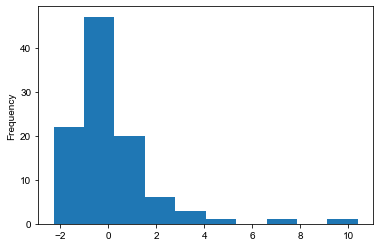

In [9]:
m1h.loc[m1h['gene'].isin(df['gene'].unique()), 'mean'].plot.hist()

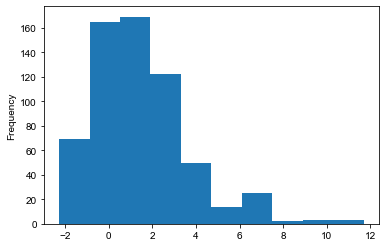

In [10]:
m1h.loc[:, 'mean'].plot.hist()

In [11]:
df.columns

Index(['gene', 'ref_iso', 'alt_iso', 'accession', 'deletion', 'insertion',
       'frameshift', 'length'],
      dtype='object')

In [12]:
df['is_affected'] = df[['deletion', 'insertion', 'frameshift']].sum(axis=1) > 0
df['complete_removal'] = (df['deletion'] == df['length'])

In [13]:
df['is_affected'].value_counts()

False    41
True     33
Name: is_affected, dtype: int64

In [14]:
df['complete_removal'].value_counts()

False    67
True      7
Name: complete_removal, dtype: int64

In [15]:
m1h['iso_acc'] = m1h['clone_acc'].apply(lambda x: x.split('|')[0] + '-' + x.split('|')[1].split('/')[0])

In [16]:
df['m1h_ref'] = df['ref_iso'].map(m1h.set_index('iso_acc')['mean'])
df['m1h_alt'] = df['alt_iso'].map(m1h.set_index('iso_acc')['mean'])

In [17]:
df.head()

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length,is_affected,complete_removal,m1h_ref,m1h_alt
0,ZFP1,ZFP1-1,ZFP1-2,PF01352,27,0,0,41,True,False,-2.005591,-0.617791
1,ZFP1,ZFP1-1,ZFP1-3,PF01352,0,0,0,41,False,False,-2.005591,0.077712
2,ZFP1,ZFP1-1,ZFP1-4,PF01352,41,0,0,41,True,True,-2.005591,0.339418
3,ZKSCAN1,ZKSCAN1-1,ZKSCAN1-2,PF01352,0,0,0,41,False,False,0.211933,-0.912573
4,ZKSCAN3,ZKSCAN3-1,ZKSCAN3-2,PF01352,0,0,0,41,False,False,1.062538,1.571580


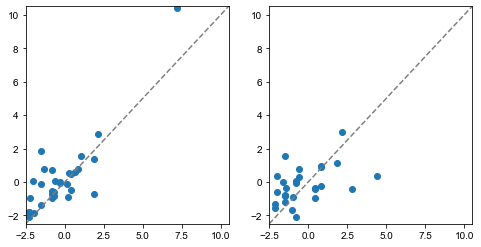

In [18]:
# scatter
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8, 4)
axs[0].scatter(df.loc[~df['is_affected'], 'm1h_ref'].values,
               df.loc[~df['is_affected'], 'm1h_alt'].values)
axs[1].scatter(df.loc[df['is_affected'], 'm1h_ref'].values,
               df.loc[df['is_affected'], 'm1h_alt'].values)
for ax in axs:
    low, high = -2.5, 10.5
    ax.set_xlim(low, high)
    ax.set_ylim(low, high)
    ax.plot([low, high], [low, high], linestyle='--', color='grey')

MannwhitneyuResult(statistic=412.0, pvalue=0.46274107024193056)


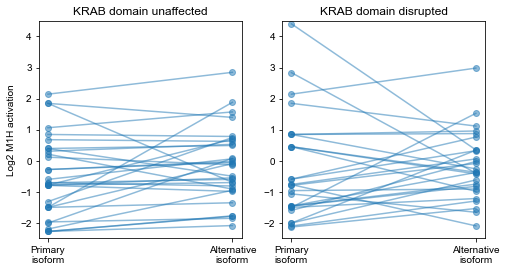

In [19]:
def pair_plot(df):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    for _i, row in df.iterrows():
        axs[int(row['is_affected'])].plot(
            [0, 1], 
            [row['m1h_ref'], row['m1h_alt']],
            'o-',
            color='C0', alpha=0.5)
    for ax in axs:
        ax.set_ylim(-2.5, 4.5)  # NOTE: this cuts off a datapoint
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Primary\nisoform', 'Alternative\nisoform'])
    axs[0].set_ylabel('Log2 M1H activation')
    axs[0].set_title('KRAB domain unaffected')
    axs[1].set_title('KRAB domain disrupted')
    a = (df.loc[~df['is_affected'], 'm1h_ref'] - df.loc[~df['is_affected'], 'm1h_alt']).values
    b = (df.loc[df['is_affected'], 'm1h_ref'] - df.loc[df['is_affected'], 'm1h_alt']).values
    print(stats.mannwhitneyu(a, b))


pair_plot(df.dropna())
plt.savefig('../../figures/KRAB-affected-M1H_pairplot.pdf',
            bbox_inches='tight')

In [24]:
tfs['ATF2'].orfs[1].name

'ATF2-2'

In [117]:
dbd_to_plot

Index(['C2H2 ZF', 'bHLH', 'Homeodomain', 'Nuclear receptor', 'HMG/Sox', 'bZIP',
       'Ets', 'SMAD', 'Forkhead'],
      dtype='object')

In [29]:
from data_loading import load_tf_families
df = pd.DataFrame([(tf_name, tf.orfs[0].name, alt_iso.name) for tf_name, tf in tfs.items() for alt_iso in tf.orfs[1:]],
                    columns=['gene', 'ref_iso', 'alt_iso'])
tf_fam = load_tf_families()
df['DBD'] = df['gene'].map(tf_fam)
df['m1h_ref'] = df['ref_iso'].map(m1h.set_index('iso_acc')['mean'])
df['m1h_alt'] = df['alt_iso'].map(m1h.set_index('iso_acc')['mean'])

,gene,ref_iso,alt_iso,DBD
0,ZBTB18,ZBTB18-1,ZBTB18-2,C2H2 ZF
1,PRRX1,PRRX1-1,PRRX1-2,Homeodomain
2,PRRX1,PRRX1-1,PRRX1-3,Homeodomain
3,POU2F1,POU2F1-1,POU2F1-2,Homeodomain; POU
4,ATF3,ATF3-1,ATF3-2,bZIP


In [42]:
len(dbd_to_plot) ** 0.5

3.0

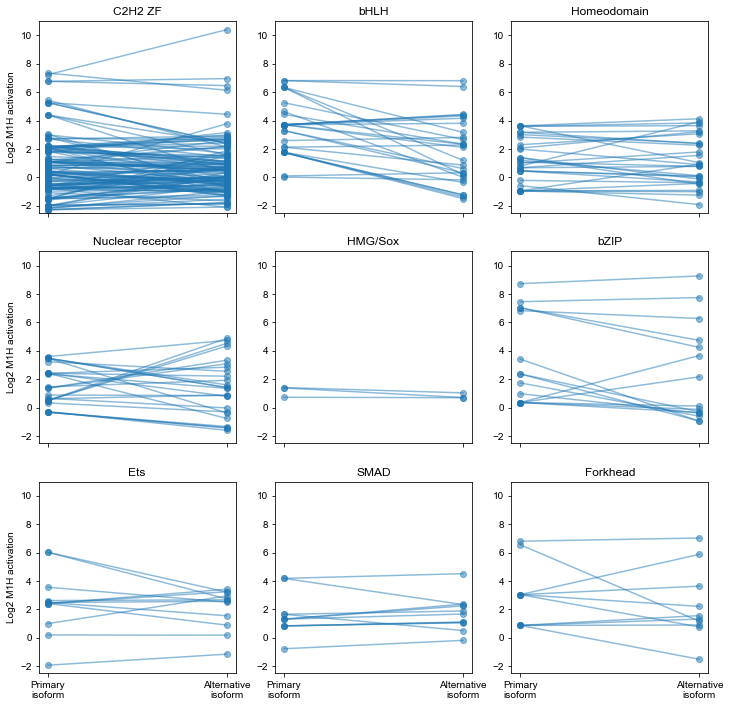

In [51]:
dbd_to_plot = df['DBD'].value_counts()[df['DBD'].value_counts() >= 10].index
if len(dbd_to_plot) != 9:
    raise UserWarning('Number of families above cutoff had changed')
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(4 * 3, 4 * 3)
for family, ax in zip(dbd_to_plot, axs.flatten()):
    for _i, row in df.loc[(df['DBD'] == family) & df['m1h_ref'].notnull() & df['m1h_alt'].notnull(), :].iterrows():
        ax.plot([0, 1], 
                [row['m1h_ref'], row['m1h_alt']],
                'o-',
                color='C0', alpha=0.5)
    ax.set_ylim(-2.5, 11)
    ax.set_xticks([0, 1])

    ax.set_title(family)
for ax in axs[:, 0]:
    ax.set_ylabel('Log2 M1H activation')
for ax in axs[:-1, :].flatten():
    ax.set_xticklabels(['', ''])
for ax in axs[-1, :]:
    ax.set_xticklabels(['Primary\nisoform', 'Alternative\nisoform'])
plt.savefig('../../figures/m1h_by-DBD-family_pairplot.pdf',
            bbox_inches='tight')

In [96]:
m1h['DBD'] = m1h['gene'].map(tf_fam)

C2H2 ZF 3.999000153234811
bHLH 0.00010561707345773583
Homeodomain 0.008049158836107845
Nuclear receptor 0.0012159614958710285
HMG/Sox 0.07866767729230216
bZIP 0.002934300612440041
Ets 0.002022305729202092
SMAD 0.03771262026016983
Forkhead 0.006564991660407399


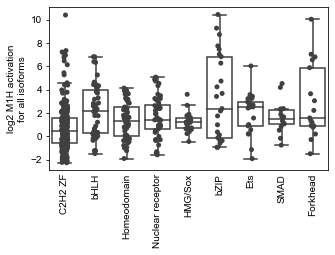

In [102]:
# m1h for all isoforms

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 3)
sns.boxplot(data=m1h, x='DBD', y='mean', order=dbd_to_plot, ax=ax, boxprops={'facecolor': 'w'}, fliersize=0)
sns.stripplot(data=m1h, x='DBD', y='mean', order=dbd_to_plot, ax=ax, color='.25')
ax.set_xlabel('')
ax.set_ylabel('log2 M1H activation\nfor all isoforms')
ax.xaxis.set_tick_params(rotation=90, length=0)

# p-values
for dbd in dbd_to_plot:
    print(dbd, stats.mannwhitneyu(m1h.loc[(m1h['DBD'] == 'C2H2 ZF') & m1h['mean'].notnull(), 'mean'].values,
                                  m1h.loc[(m1h['DBD'] == dbd) & m1h['mean'].notnull(), 'mean'].values)[1] * 8)

plt.savefig('../../figures/M1H-all_isoforms_by-TF-family_boxplot.pdf',
            bbox_inches='tight')

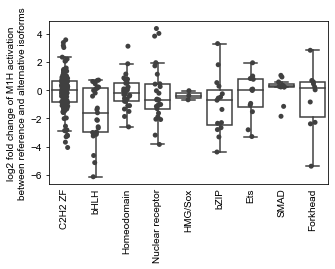

In [99]:
df['m1h_change'] = df['m1h_alt'] - df['m1h_ref']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 3)
sns.boxplot(data=df, x='DBD', y='m1h_change', order=dbd_to_plot, ax=ax, boxprops={'facecolor': 'w'}, fliersize=0)
sns.stripplot(data=df, x='DBD', y='m1h_change', order=dbd_to_plot, ax=ax, color='.25')
ax.set_xlabel('')
ax.set_ylabel('log2 fold change of M1H activation\nbetween reference and alternative isoforms')
ax.xaxis.set_tick_params(rotation=90, length=0)
plt.savefig('../../figures/M1H-change_by-TF-family_boxplot.pdf',
            bbox_inches='tight')

C2H2 ZF 3.9974273949832493
bHLH 0.05611515365520313
Homeodomain 2.1461700275604936
Nuclear receptor 0.02826252613665936
HMG/Sox 0.706914044908797
bZIP 0.06281889834983735
Ets 2.070729135196485
SMAD 1.8775282377455507
Forkhead 1.6369598665252392


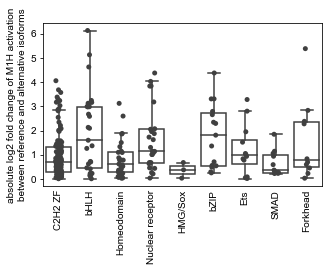

In [100]:
# absolute difference
df['m1h_abs_change'] = (df['m1h_alt'] - df['m1h_ref']).abs()
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 3)
sns.boxplot(data=df, x='DBD', y='m1h_abs_change', order=dbd_to_plot, ax=ax, boxprops={'facecolor': 'w'}, fliersize=0)
sns.stripplot(data=df, x='DBD', y='m1h_abs_change', order=dbd_to_plot, ax=ax, color='.25')
ax.set_xlabel('')
ax.set_ylabel('absolute log2 fold change of M1H activation\nbetween reference and alternative isoforms')
ax.xaxis.set_tick_params(rotation=90, length=0)

# p-values
for dbd in dbd_to_plot:
    print(dbd, stats.mannwhitneyu(df.loc[(df['DBD'] == 'C2H2 ZF') & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values,
                                  df.loc[(df['DBD'] == dbd) & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values)[1] * 8)

plt.savefig('../../figures/M1H-absolute-change_by-TF-family_boxplot.pdf',
            bbox_inches='tight')

In [103]:
df['n_aa_diff'] = df.apply(lambda x: len(tfs[x['gene']][x['ref_iso']].aa_seq) - len(tfs[x['gene']][x['alt_iso']].aa_seq), axis=1)

In [110]:
(df['n_aa_diff'] < 1).sum()
# HACK
df['n_aa_diff'] = df['n_aa_diff'].abs()

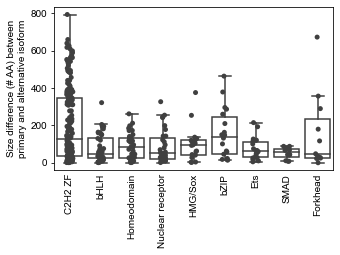

In [113]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 3)
sns.boxplot(data=df, x='DBD', y='n_aa_diff', order=dbd_to_plot, ax=ax, boxprops={'facecolor': 'w'}, fliersize=0)
sns.stripplot(data=df, x='DBD', y='n_aa_diff', order=dbd_to_plot, ax=ax, color='.25')
ax.set_xlabel('')
ax.set_ylabel('Size difference (# AA) between\nprimary and alternative isoform')
ax.xaxis.set_tick_params(rotation=90, length=0)

# p-values
#for dbd in dbd_to_plot:
#    print(dbd, stats.mannwhitneyu(df.loc[(df['DBD'] == 'C2H2 ZF') & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values,
#                                  df.loc[(df['DBD'] == dbd) & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values)[1] * 8)

plt.savefig('../../figures/n-AA-diff_by-TF-family_boxplot.pdf',
            bbox_inches='tight')

In [114]:
df['pct_aa_diff'] = (df.apply(lambda x: (len(tfs[x['gene']][x['ref_iso']].aa_seq) - len(tfs[x['gene']][x['alt_iso']].aa_seq)) / len(tfs[x['gene']][x['ref_iso']].aa_seq), axis=1) * 100).abs()

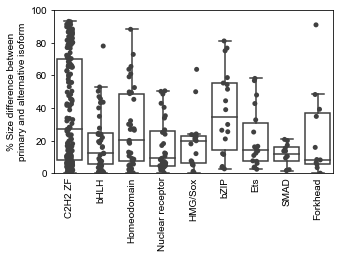

In [116]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 3)
sns.boxplot(data=df, x='DBD', y='pct_aa_diff', order=dbd_to_plot, ax=ax, boxprops={'facecolor': 'w'}, fliersize=0)
sns.stripplot(data=df, x='DBD', y='pct_aa_diff', order=dbd_to_plot, ax=ax, color='.25')
ax.set_xlabel('')
ax.set_ylabel('% Size difference between\nprimary and alternative isoform')
ax.xaxis.set_tick_params(rotation=90, length=0)
ax.set_ylim(0, 100)

# p-values
#for dbd in dbd_to_plot:
#    print(dbd, stats.mannwhitneyu(df.loc[(df['DBD'] == 'C2H2 ZF') & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values,
#                                  df.loc[(df['DBD'] == dbd) & df['m1h_abs_change'].notnull(), 'm1h_abs_change'].values)[1] * 8)

plt.savefig('../../figures/pct-AA-diff_by-TF-family_boxplot.pdf',
            bbox_inches='tight')

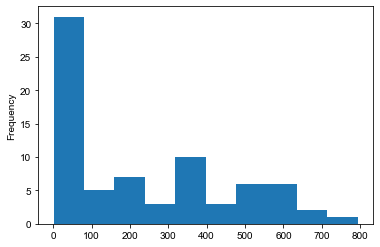

In [88]:
df['n_aa_diff'].plot.hist()

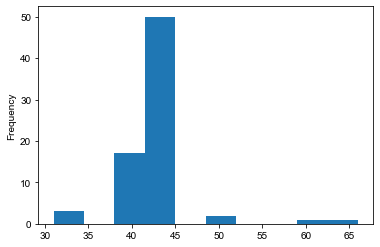

In [90]:
df['length'].plot.hist()

In [91]:
df.shape

(74, 13)

In [93]:
(df['n_aa_diff'] <= 100).sum()

32

MannwhitneyuResult(statistic=84.0, pvalue=0.18547551726654832)


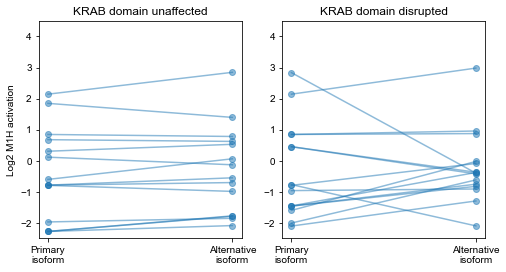

In [106]:
pair_plot(df.dropna().loc[df['n_aa_diff'] <= 100, :])
plt.savefig('../../figures/KRAB-affected-M1H_less-than-100-aa-diff_pairplot.pdf',
            bbox_inches='tight')

In [116]:
df.to_csv('~/Desktop/M1H_KRAB_TFs.tsv', sep='\t', index=False)

In [107]:
# check overlap of KRAB PFam domain with manually annotated
doms = pd.read_excel('../../data/internal/TF_reg_domain_2019-08-13.xlsx',
                   sheet_name='Sheet1')
doms = (doms.loc[:, ['symbol', 'Domain type', 'Domain sequence', 'aa position']]
        .rename(columns={'symbol': 'hgnc_gene_symbol',
                         'Domain type': 'type',
                         'Domain sequence': 'aa_seq',
                         'aa position': 'pos'}))
doms = doms.dropna()
doms['aa_seq'] = doms['aa_seq'].str.replace(' ', '')

In [112]:
df.head()

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length,is_affected,complete_removal,m1h_ref,m1h_alt,n_aa_diff
0,ZFP1,ZFP1-1,ZFP1-2,PF01352,27,0,0,41,True,False,-2.005591,-0.617791,32
1,ZFP1,ZFP1-1,ZFP1-3,PF01352,0,0,0,41,False,False,-2.005591,0.077712,336
2,ZFP1,ZFP1-1,ZFP1-4,PF01352,41,0,0,41,True,True,-2.005591,0.339418,378
3,ZKSCAN1,ZKSCAN1-1,ZKSCAN1-2,PF01352,0,0,0,41,False,False,0.211933,-0.912573,177
4,ZKSCAN3,ZKSCAN3-1,ZKSCAN3-2,PF01352,0,0,0,41,False,False,1.062538,1.571580,119
